Original Shape: (891, 12)

Dataset Info:
<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    str    
 4   Sex          891 non-null    str    
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    str    
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    str    
 11  Embarked     889 non-null    str    
dtypes: float64(2), int64(5), str(5)
memory usage: 83.7 KB

Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin      

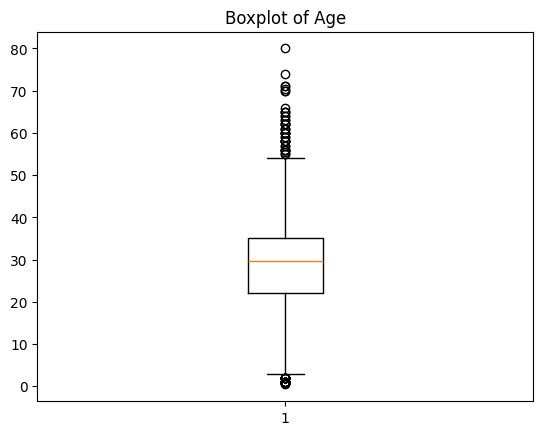

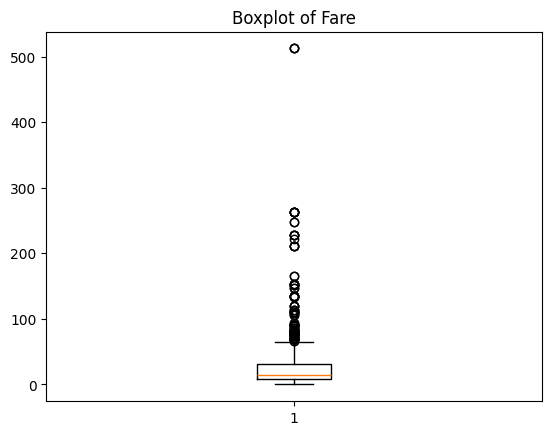

Shape After Outlier Removal: (718, 9)

Final Feature Shape: (718, 8)
Target Shape: (718,)

Preprocessing Completed Successfully ✅
Preprocessed dataset saved to Titanic-Dataset-Preprocessed.csv


In [5]:
# -----------------------------
# 1. Import Libraries
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# -----------------------------
# 2. Load Dataset
# -----------------------------

df = pd.read_csv("Titanic-Dataset.csv")

print("Original Shape:", df.shape)
print("\nDataset Info:")
df.info()
print("\nMissing Values:")
print(df.isnull().sum())


# -----------------------------
# 3. Drop Irrelevant Columns
# -----------------------------
df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)


# -----------------------------
# 4. Handle Missing Values
# -----------------------------
# Numerical columns
num_cols = ["Age", "Fare"]
num_imputer = SimpleImputer(strategy="mean")
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Categorical column
cat_cols = ["Embarked"]
cat_imputer = SimpleImputer(strategy="most_frequent")
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

print("\nMissing Values After Imputation:")
print(df.isnull().sum())


# -----------------------------
# 5. One-Hot Encoding
# -----------------------------
df = pd.get_dummies(df, columns=["Sex", "Embarked"], drop_first=True)

print("\nDataset After Encoding:")
print(df.head())


# -----------------------------
# 6. Outlier Detection (Age & Fare)
# -----------------------------
for col in ["Age", "Fare"]:
    plt.figure()
    plt.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# Remove outliers using IQR
for col in ["Age", "Fare"]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

print("Shape After Outlier Removal:", df.shape)


# -----------------------------
# 7. Feature Scaling
# -----------------------------
X = df.drop("Survived", axis=1)
y = df["Survived"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_final = pd.DataFrame(X_scaled, columns=X.columns)

print("\nFinal Feature Shape:", X_final.shape)
print("Target Shape:", y.shape)

print("\nPreprocessing Completed Successfully ✅")

# -----------------------------
# 8. Save Preprocessed Dataset
# -----------------------------
output_path = "Titanic-Dataset-Preprocessed.csv"
df.to_csv(output_path, index=False)

print(f"Preprocessed dataset saved to {output_path}")


In [6]:
# Basic info
df.info()

# Statistical summary for numerical columns
df.describe()

# Median separately
df.median(numeric_only=True)

# Check missing values
df.isnull().sum()


<class 'pandas.DataFrame'>
Index: 718 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    718 non-null    int64  
 1   Pclass      718 non-null    int64  
 2   Age         718 non-null    float64
 3   SibSp       718 non-null    int64  
 4   Parch       718 non-null    int64  
 5   Fare        718 non-null    float64
 6   Sex_male    718 non-null    bool   
 7   Embarked_Q  718 non-null    bool   
 8   Embarked_S  718 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 41.4 KB


Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

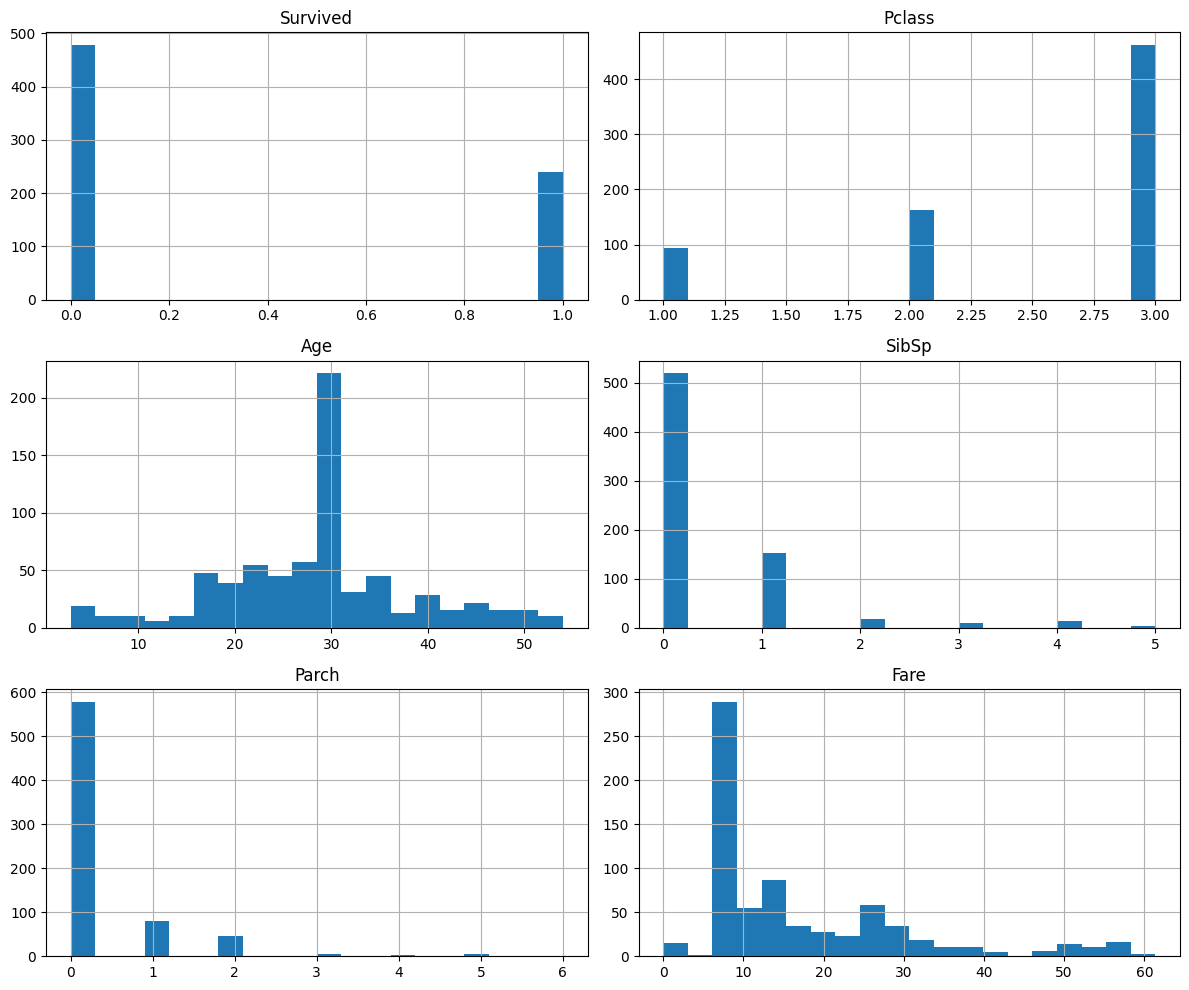

In [7]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[numeric_cols].hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

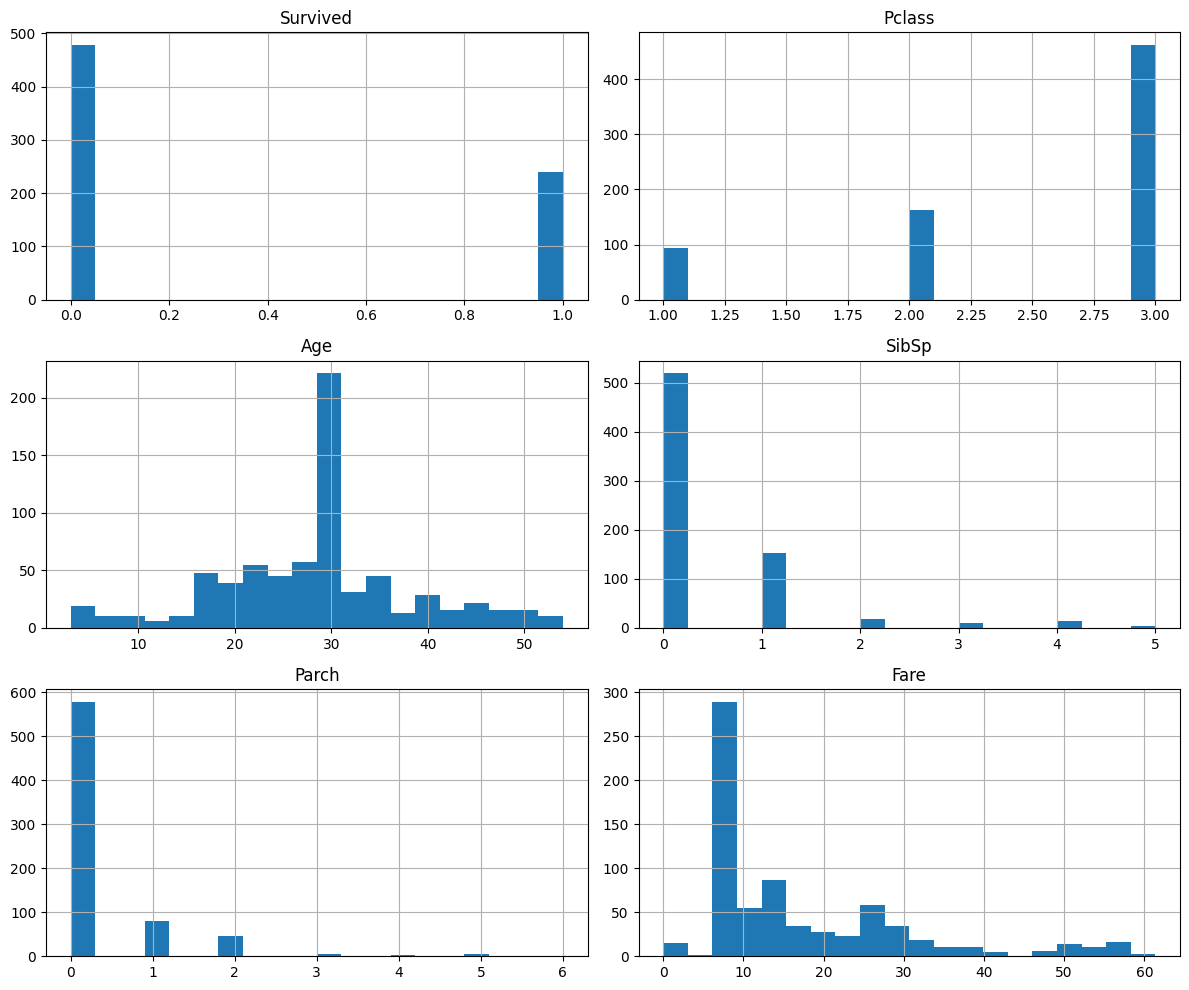

In [9]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[numeric_cols].hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()


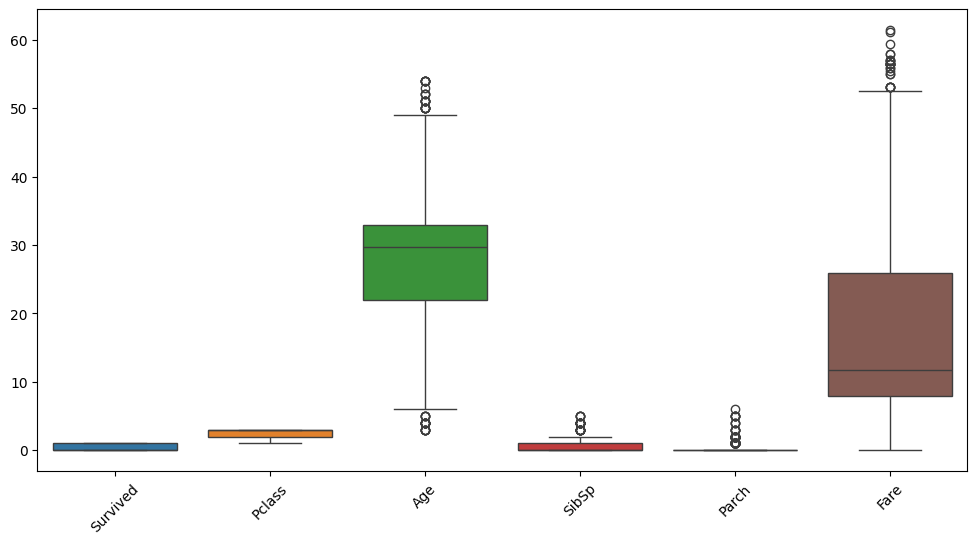

In [10]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=45)
plt.show()


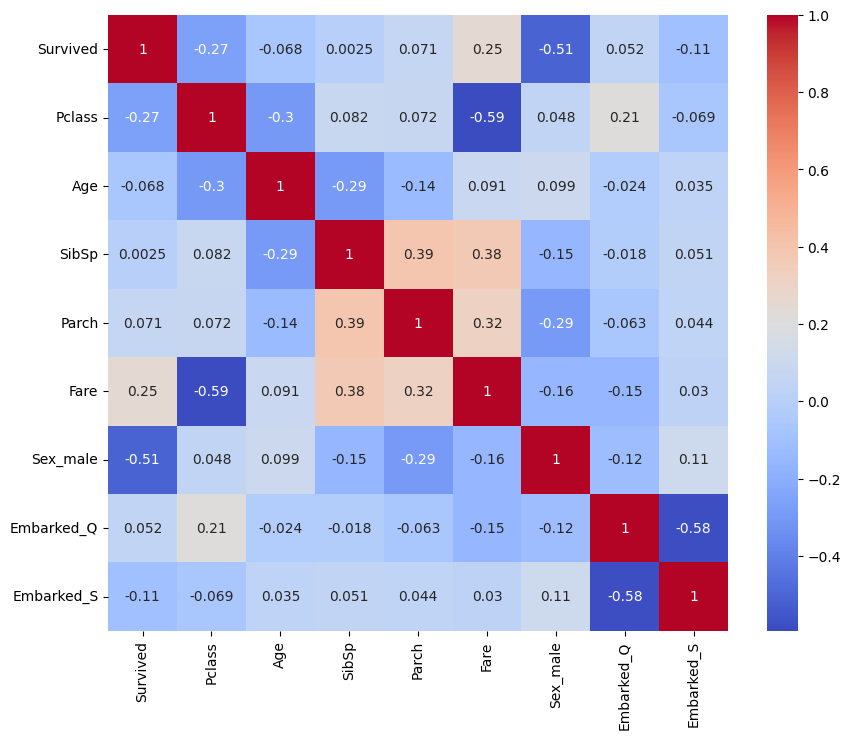

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), 
            annot=True, 
            cmap='coolwarm')
plt.show()


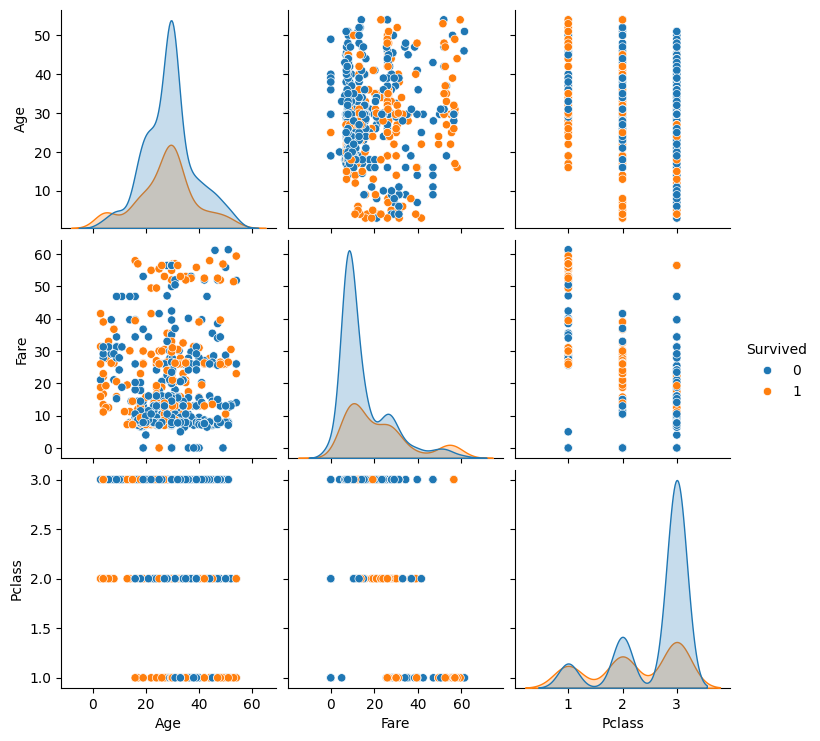

In [12]:
sns.pairplot(df[['Survived', 'Age', 'Fare', 'Pclass']], hue='Survived')
plt.show()


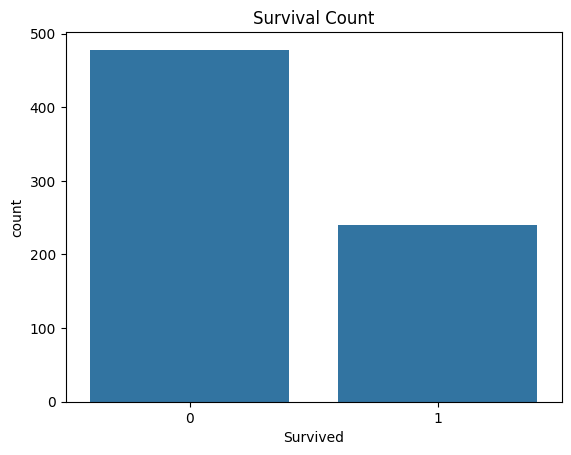

In [13]:
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()


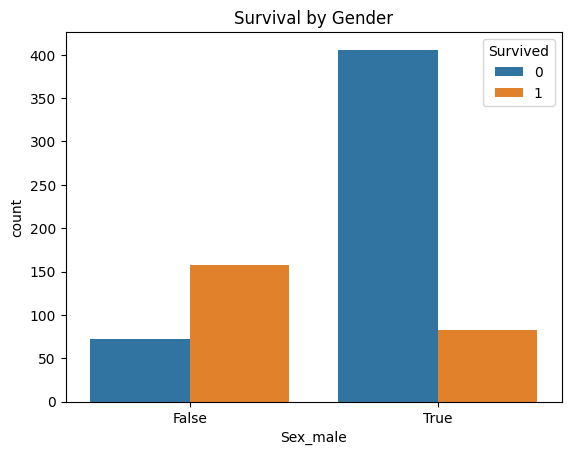

In [14]:
sns.countplot(x='Sex_male', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.show()


In [15]:
fig = px.histogram(df, x="Pclass", color="Survived",
                   barmode="group",
                   title="Survival by Passenger Class")
fig.show()



In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [18]:

# Select relevant columns
df = df[['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']]

# Handle missing values
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Check final data
print(df.head())

         Age     Fare  Pclass  SibSp  Parch
0  22.000000   7.2500       3      1      0
2  26.000000   7.9250       3      0      0
3  35.000000  53.1000       1      1      0
4  35.000000   8.0500       3      0      0
5  29.699118   8.4583       3      0      0


C:\Users\ARPIT SRIVASTAVA\AppData\Local\Temp\ipykernel_12436\718103363.py:5: ChainedAssignmentError:

A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html



In [19]:
X = df[['Age']]   # Independent variable
y = df['Fare']    # Target variable


In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [21]:
model = LinearRegression()
model.fit(X_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [22]:
y_pred = model.predict(X_test)


In [23]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R² Score:", r2)


MAE: 10.306683992335138
MSE: 176.10133923992439
R² Score: 0.008980037841973654


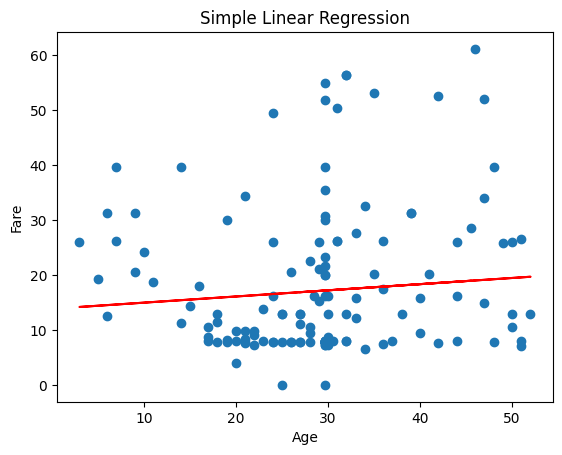

In [24]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Simple Linear Regression")
plt.show()


In [25]:
print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])


Intercept: 13.8547680051426
Slope: 0.112280994514332


Multiple Linear Regression

Predict Fare using multiple features:

Age

Pclass

SibSp

Parch

In [26]:
X = df[['Age', 'Pclass', 'SibSp', 'Parch']]
y = df['Fare']


In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [28]:
model_multi = LinearRegression()
model_multi.fit(X_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [29]:
y_pred_multi = model_multi.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred_multi))
print("MSE:", mean_squared_error(y_test, y_pred_multi))
print("R²:", r2_score(y_test, y_pred_multi))


MAE: 4.944788210127819
MSE: 80.15348061909361
R²: 0.5489318839208484


In [30]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model_multi.coef_
})

print(coefficients)
print("Intercept:", model_multi.intercept_)


  Feature  Coefficient
0     Age     0.057513
1  Pclass   -11.351298
2   SibSp     5.486742
3   Parch     4.231258
Intercept: 40.33833122043995
